In [2]:
#!pip install dlib

In [3]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib
from imutils import face_utils

In [5]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/test_cv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['fdfdt.PNG',
 '1.PNG',
 '211.PNG',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalface_default.xml',
 '_12.jpg',
 '_10.jpg',
 '_8.jpg',
 '_18.jpg',
 '_20.jpg',
 '_32.jpg',
 '_28.jpg',
 '_22.jpg',
 '_30.jpg',
 '_38.jpg',
 '_48.jpg',
 '_40.jpg',
 '_50.jpg',
 '_42.jpg',
 '_60.jpg',
 '_52.jpg',
 '_58.jpg',
 '_70.jpg',
 '_72.jpg',
 '_68.jpg',
 '_62.jpg',
 '_88.jpg',
 '_80.jpg',
 '_78.jpg',
 '_82.jpg',
 '_90.jpg',
 '_92.jpg',
 '_98.jpg',
 '_100.jpg',
 '_108.jpg',
 '_110.jpg',
 '_102.jpg',
 '_132.jpg',
 '_120.jpg',
 '_130.jpg',
 '_122.jpg',
 '_112.jpg',
 '_118.jpg',
 '_128.jpg',
 '_140.jpg',
 '_138.jpg',
 '_148.jpg',
 '_142.jpg',
 '_150.jpg',
 '_158.jpg',
 '_152.jpg',
 '_168.jpg',
 '_160.jpg',
 '_162.jpg',
 'dlib_face_recognition_resnet_model_v1.dat',
 'shape_predictor_68_face_landmarks.dat']

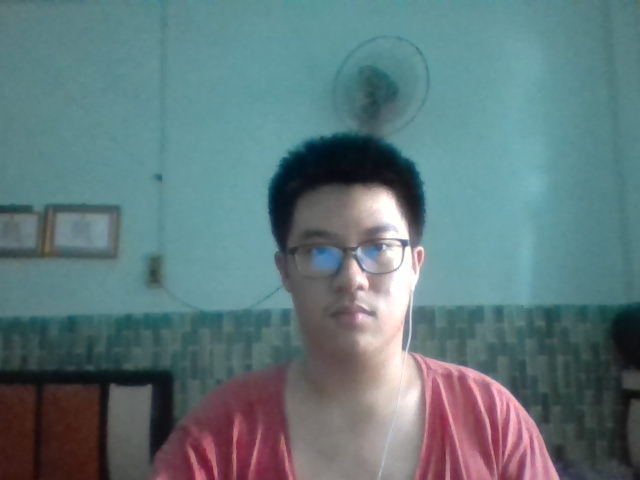

In [7]:
# Hiển thị một ảnh
img = cv2.imread(path + "/_160.jpg")
cv2_imshow(img)

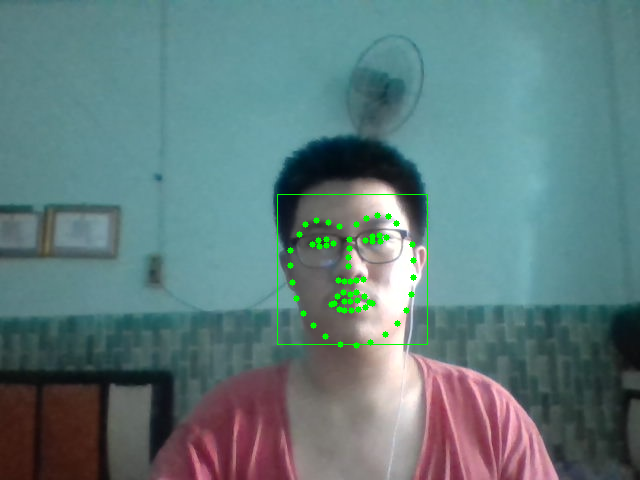

In [8]:
face_landmarks_model_path = "/content/drive/MyDrive/test_cv/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = "/content/drive/MyDrive/test_cv/dlib_face_recognition_resnet_model_v1.dat"
img_path = "/content/drive/MyDrive/test_cv/_10.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

    # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    # print(face_descriptors)

    # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)